In [1]:
import pandas as pd
import numpy as np
import matplotlib as np

In [4]:
#trick 1
import pandas_profiling

users = pd.read_table('http://bit.ly/movieusers')
pandas_profiling.ProfileReport(users)

In [5]:
users.describe()

,1|24|M|technician|85711
count,942
unique,942
top,443|35|M|salesman|33308
freq,1


In [6]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 1 columns):
1|24|M|technician|85711    942 non-null object
dtypes: object(1)
memory usage: 7.4+ KB


In [ ]:
#gb = df.groupby(["TimeFrame", "VehicleId", "VehicleJourneyId"], as_index=False, group_keys=False)
#gb = gb.filter(lambda x: len(x) > 5)
#df = pd.DataFrame(gb)

#gb.apply(func_name)

In [1]:
import networkx as nx
import pandas as pd
import random

years, graphs = list(zip(*[(year, nx.barbell_graph(random.randint(3,25),random.randint(3,25))) for year in range(2000,2005)]))
df = pd.DataFrame({"graph": graphs}, index=years)

df["number_of_nodes"] = df.graph.apply(nx.number_of_nodes)
df["number_of_edges"] = df.graph.apply(nx.number_of_edges)
df["avg_shortest_path"] = df.graph.apply(nx.average_shortest_path_length)
df["transitivity"] = df.graph.apply(nx.transitivity)


df.drop("graph", axis=1)

,number_of_nodes,number_of_edges,avg_shortest_path,transitivity
2000,48,389,5.822695,0.993320
2001,52,471,5.841629,0.994618
2002,39,94,10.839406,0.931608
2003,62,523,9.598625,0.994385
2004,71,532,13.650704,0.993548


In [ ]:
#To find the summary of categorical features we can do:
df.describe(include=['object'])

In [ ]:
# Filter out groups with less than 5 rows of data
gb = df.groupby(["TimeFrame", "VehicleId", "VehicleJourneyId"], as_index=False, group_keys=False)
gb = gb.filter(lambda x: len(x) > 5)
df = pd.DataFrame(gb)

In [ ]:
df.isnull().sum().sum()

Returns total summation of all nulls in DataFrame.

In [4]:
import pandas as pd

tables = pd.read_html("http://apps.sandiego.gov/sdfiredispatch/")

print(tables[1])


import pandas as pd

calls_df, = pd.read_html("http://apps.sandiego.gov/sdfiredispatch/", header=0, parse_dates=["Call Date"])

print(calls_df)


import pandas as pd

calls_df, = pd.read_html("http://apps.sandiego.gov/sdfiredispatch/", header=0, parse_dates=["Call Date"])

print(calls_df.to_json(orient="records", date_format="iso"))

ValueError: No tables found matching pattern '.+'

In [7]:
dataframe.select_dtypes(include = ['object']).columns

(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #gives % of missing data in columns!

corr_coeff = df.corr()['SalePrice'].abs().sort_values() #How columns corr. to SalePrice column. (Boston housing data ;) )
corr_coeff[corr_coeff > 0.65] #selecting columns with >0.65 than correlation values.﻿

ValueError: No tables found matching pattern '.+'

In [9]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.3.final.0
python-bits: 64
OS: Windows
OS-release: 10
machine: AMD64
processor: Intel64 Family 6 Model 63 Stepping 2, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.20.3
pytest: 3.2.1
pip: 9.0.1
setuptools: 36.5.0.post20170921
Cython: 0.26.1
numpy: 1.12.1
scipy: 0.19.1
xarray: None
IPython: 6.1.0
sphinx: 1.6.3
patsy: 0.4.1
dateutil: 2.6.1
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.4.2
numexpr: 2.6.2
feather: None
matplotlib: 2.1.0
openpyxl: 2.4.8
xlrd: 1.1.0
xlwt: 1.3.0
xlsxwriter: 1.0.2
lxml: 4.1.0
bs4: 4.6.0
html5lib: 0.999999999
sqlalchemy: 1.1.13
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
pandas_gbq: None
pandas_datareader: None


In [ ]:
Split values into two columns: Say you have df['postal_city'] with values like '2560 Hvidovre', '2300 Copenhagen' and you want to split the value to postals 2560, 2300 and city, Hvidovre, Copenhagen: 

df['postal'], df['city'] = zip(*df.postal_city.str.split(' ', 1))

In [ ]:
df['Three Digit Zip Code'] = df['Zip Code'].str[:3]

In [ ]:
df.describe().loc[['min', 'max'], ['col_1', 'col_2', ...., 'col_6']]

In [10]:
import pandas as pd
import numpy as np
% matplotlib inline

In [11]:
n = 365*5
cols = {'level_0': 'date',
        'level_1': 'item',
        0: 'qty', }
data = (pd.DataFrame(np.random.randint(0, 10, size=(n, 4)),
                     columns=['paper', 'pencils', 'note cards', 'markers'],
                     index=pd.date_range('1/1/2017', periods=n, freq='d'),
                     )
        .stack()
        .to_frame()
        .reset_index()
        .rename(columns=cols))
data.head()

,date,item,qty
0,2017-01-01,paper,1
1,2017-01-01,pencils,5
2,2017-01-01,note cards,7
3,2017-01-01,markers,3
4,2017-01-02,paper,3


In [12]:
 plot_data = (data
             .groupby(['date', 'item'])
             .sum()
             ['qty']
             .unstack()
             .resample('m')
             .sum()
             .fillna(0)
             .rolling(12)
             .sum()
             .dropna()
             )
plot_data.head()

item,markers,note cards,paper,pencils
date,,,,
2017-12-31,1551.0,1589.0,1611.0,1611.0
2018-01-31,1552.0,1582.0,1602.0,1633.0
2018-02-28,1526.0,1604.0,1623.0,1627.0
2018-03-31,1576.0,1596.0,1652.0,1623.0
2018-04-30,1585.0,1638.0,1638.0,1641.0


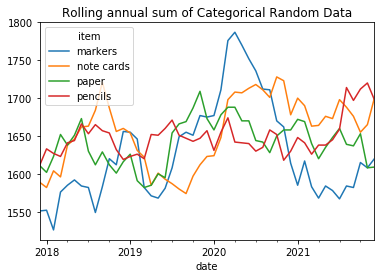

In [13]:
plot_data.plot(title='Rolling annual sum of Categorical Random Data');

In [14]:
plot_data = (data
             .groupby(['date', 'item'])
             .sum()
             )
plot_data.head()

qty
date       item           
2017-01-01 markers       3
           note cards    7
           paper         1
           pencils       5
2017-01-02 markers       3

In [15]:
plot_data = plot_data['qty']

plot_data.head()

date        item      
2017-01-01  markers       3
            note cards    7
            paper         1
            pencils       5
2017-01-02  markers       3
Name: qty, dtype: int32

In [16]:
#unstack - transform the last column in the index ('item') into rows.
plot_data = plot_data.unstack()

plot_data.head()

item,markers,note cards,paper,pencils
date,,,,
2017-01-01,3,7,1,5
2017-01-02,3,8,3,0
2017-01-03,0,5,5,0
2017-01-04,8,9,3,5
2017-01-05,1,6,9,9


In [17]:
#resample - This step is important for irregular data in order to get the data into regular intervals.

plot_data = plot_data.resample('m').sum()

plot_data.head()

item,markers,note cards,paper,pencils
date,,,,
2017-01-31,147,149,150,129
2017-02-28,133,124,115,117
2017-03-31,112,128,124,146
2017-04-30,125,111,137,113
2017-05-31,136,117,120,140


In [18]:
#rolling
plot_data = plot_data.rolling(12).sum()

plot_data.head(20)

item,markers,note cards,paper,pencils
date,,,,
2017-01-31,NaN,NaN,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN
2017-05-31,NaN,NaN,NaN,NaN
2017-06-30,NaN,NaN,NaN,NaN
2017-07-31,NaN,NaN,NaN,NaN
2017-08-31,NaN,NaN,NaN,NaN
2017-09-30,NaN,NaN,NaN,NaN


In [19]:
plot_data = plot_data.dropna()

plot_data.head(10)

item,markers,note cards,paper,pencils
date,,,,
2017-12-31,1551.0,1589.0,1611.0,1611.0
2018-01-31,1552.0,1582.0,1602.0,1633.0
2018-02-28,1526.0,1604.0,1623.0,1627.0
2018-03-31,1576.0,1596.0,1652.0,1623.0
2018-04-30,1585.0,1638.0,1638.0,1641.0
2018-05-31,1592.0,1646.0,1651.0,1644.0
2018-06-30,1584.0,1662.0,1673.0,1666.0
2018-07-31,1582.0,1663.0,1630.0,1653.0
2018-08-31,1549.0,1684.0,1612.0,1665.0


In [ ]:
pandas.to_numeric(arg, errors='raise', downcast=None)

In [ ]:
#atleast thrice as faster than data[column].unique().
data[column].drop_duplicates()
%timeit 

In [ ]:
##Drop all features in data set that have above 50% null values
df_train.drop(df_train.columns[df_train.isnull().sum() > df_train.shape[0]/2].tolist(), axis = 1, inplace=True)

In [ ]:
#calculate the moving averages
pandas.rolling_mean

In [ ]:
def flexible_filter(df, filters):
    return df[(df[list(filters)] == pd.Series(filters)).all(axis=1)]


In [ ]:
Series.value_counts(normalize = True) * 100

In [ ]:
Real world case: extract string data from Pandas dateframe with conditions

from ast import literal_eval
df=pd.DataFrame({'id':[1,2,3],'status':['good','good','bad'],'rate':['{"id": 101, "win": {"interval": 21, "pay_rate": 0.239}}','{"id": 1892, "win": {"interval": 35, "pay_rate": 0.769}}','{"id": 153, "lose": {"interval": 39, "pay_rate": 0.369}}']})
df['rate'] = df['rate'].apply(literal_eval)

s=df.rate.apply(pd.Series).set_index('id').stack().apply(pd.Series)
s.loc[(slice(None),'win'),:].i